# Bitcoin daily returns correlation

In [14]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
import numpy as np
import datetime
from pytz import timezone
est = timezone('US/Eastern')


def parser(x):    
    return datetime.datetime.strptime(x, '%Y-%m-%d')

data = pd.read_csv("merged_data.csv",header=None, parse_dates=[1], squeeze=True, date_parser=parser)

data.columns = ['Index','Time','Price','Sentiment']

datag = data[['Price','Sentiment']].groupby(data['Time']).mean()




---

### Correlation between Daily returns and Sentiment

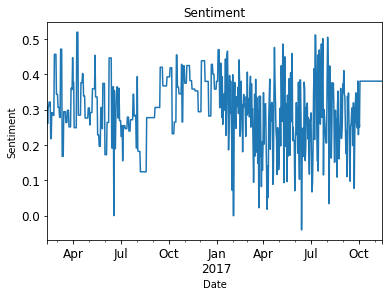

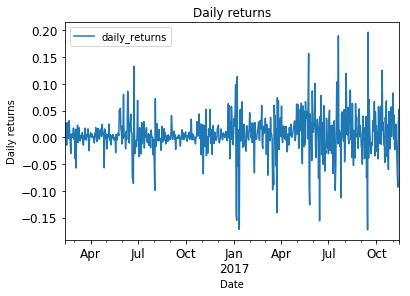

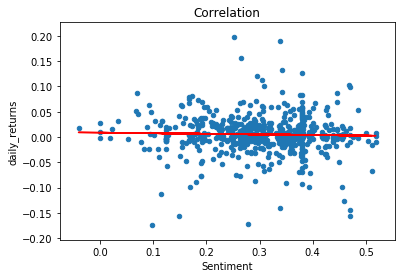

Alpha: 0.00865937197731
Beta: -0.0116471631279


In [15]:
import matplotlib.pyplot as plt

data_df = None

def plot_data(df, title="Sentiment", xlabel="Date", ylabel="Sentiment"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()


def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # TODO: Your code here
    
    daily_returns = df.copy()
    
    daily_returns[1:] = (df[1:] / df[:-1].values) - 1
    
    daily_returns.iloc[0,:] = 0 # set daily returns for row 0 to 0
    
    return daily_returns
    # Note: Returned DataFrame must have the same number of rows

def daily_returns_test_run():    
    # Read data
               
    df = datag
     
    plot_data(df['Sentiment'])    
    
    # Compute daily returns
    
    dp = df.copy()
    
    del dp['Sentiment']
    
    daily_returns = compute_daily_returns(dp)
    
    daily_returns.columns = ['daily_returns']
    
    plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")
    
    plt.show()

    daily_returns.columns = ['daily_returns']
    
    dy = df.join(daily_returns)

    dy.plot(kind='scatter', y='daily_returns', x='Sentiment', title="Correlation")
    beta, alpha = np.polyfit(dy['Sentiment'], dy['daily_returns'],1)    
    plt.plot(dy['Sentiment'],beta*dy['Sentiment']+alpha,'-',color='r')
    plt.show()
    
    print('Alpha:',alpha)

    print('Beta:',beta)
    
        

daily_returns_test_run()

### Correlation between price and sentiment
---
Shows anomalys, but nothing convincing


In [20]:
datag['price_norm'] = datag['Price'] / datag['Price'].max()

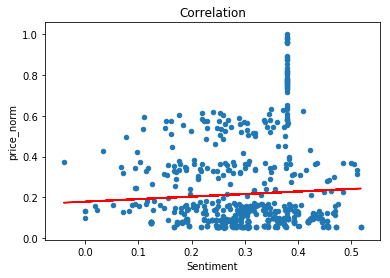

In [25]:
datag.plot(kind='scatter', y='price_norm', x='Sentiment', title="Correlation")
beta, alpha = np.polyfit(datag['Sentiment'], datag['price_norm'],1)    
plt.plot(datag['Sentiment'],beta*datag['Sentiment']+alpha,'-',color='r')
plt.show()

### Conclusion
It seems to be very unlikely predict bitcoins prices movement based on tweets sentiment.